# Data Description


Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem. 

From the original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200).



# Attribute Information:

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict: either as a continuous value or as a classification problem. 

Name / Data Type / Measurement Unit / Description 
----------------------------- 

Sex / nominal / -- / M, F, and I (infant) 

Length / continuous / mm / Longest shell measurement 

Diameter	/ continuous / mm / perpendicular to length 

Height / continuous / mm / with meat in shell 

Whole weight / continuous / grams / whole abalone 

Shucked weight / continuous	/ grams / weight of meat 

Viscera weight / continuous / grams / gut weight (after bleeding) 

Shell weight / continuous / grams / after being dried 

Rings / integer / -- / +1.5 gives the age in years 



# import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df = pd.read_csv('../input/abalone.csv')

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
df['age'] = df['Rings']+1.5
df = df.drop('Rings', axis = 1)

# EDA

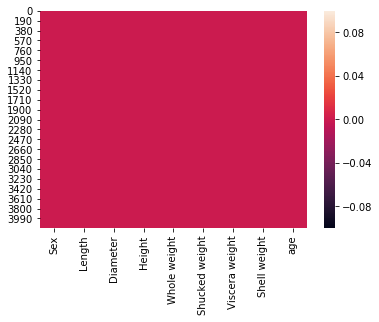

In [6]:
sns.heatmap(df.isnull())

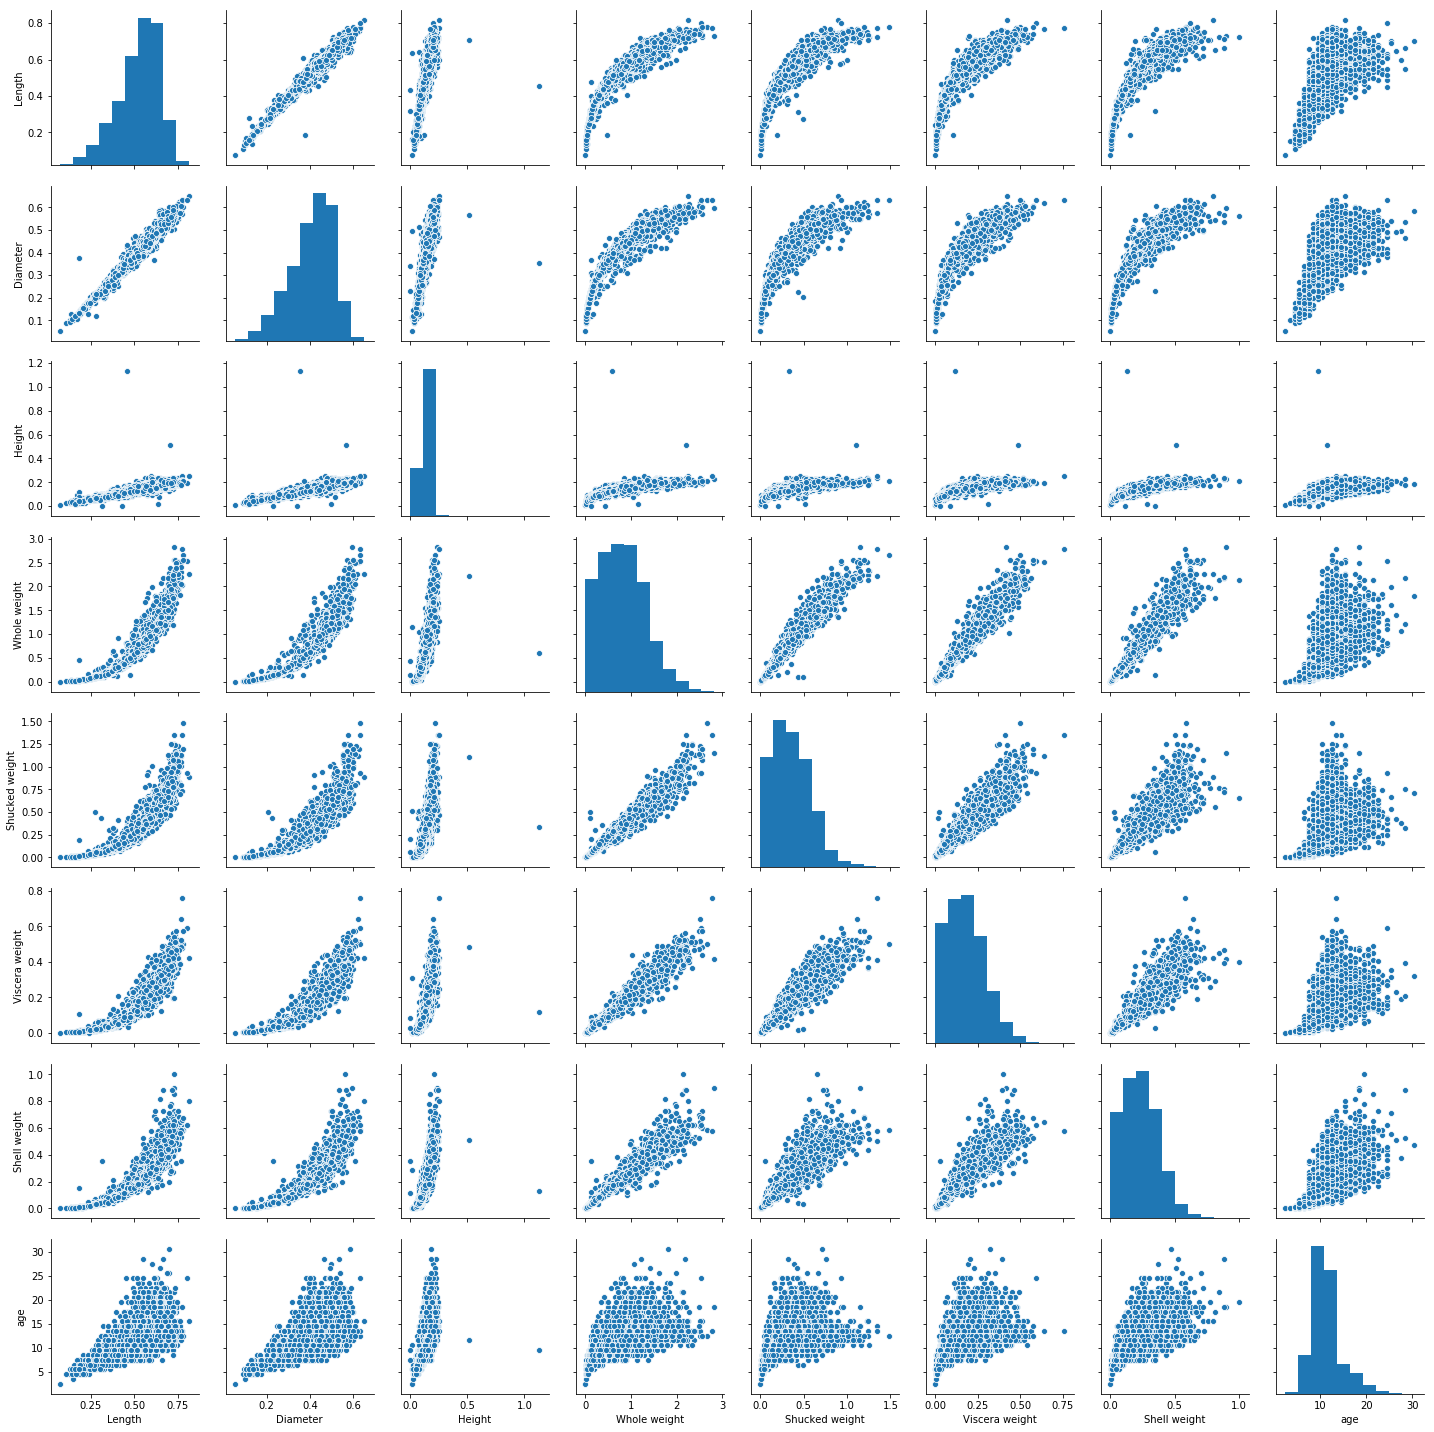

In [7]:
sns.pairplot(df)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
age               4177 non-null float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [9]:
numerical_features = df.select_dtypes(include = [np.number]).columns
categorical_features = df.select_dtypes(include = [np.object]).columns

In [10]:
numerical_features

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age'],
      dtype='object')

In [11]:
categorical_features

Index(['Sex'], dtype='object')

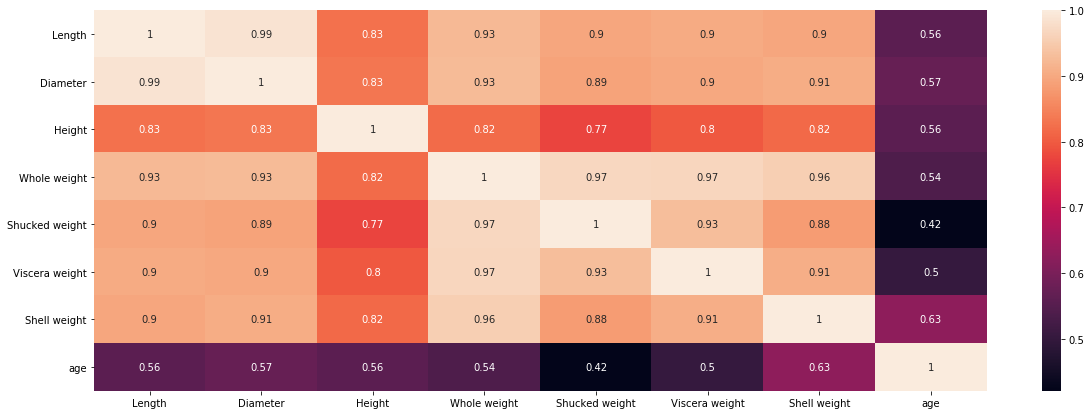

In [12]:
plt.figure(figsize = (20,7))
sns.heatmap(df[numerical_features].corr(),annot = True)

    Whole Weight is almost linearly varying with all other features except age
    Heigh has least linearity with remaining features
    Age is most linearly proprtional with Shell Weight followed by Diameter and length
    Age is least correlated with Shucked Weight


**Key insight:**

- All numerical features but 'sex'
        - Though features are not normaly distributed, are close to normality
        - None of the features have minimum = 0 except Height (requires re-check)
        - Each feature has difference scale range


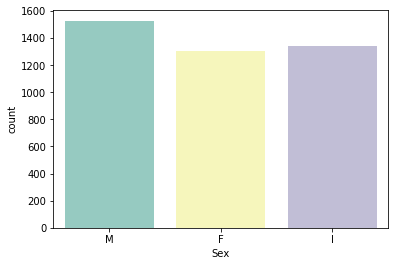

In [13]:
sns.countplot(x = 'Sex', data = df, palette = 'Set3')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


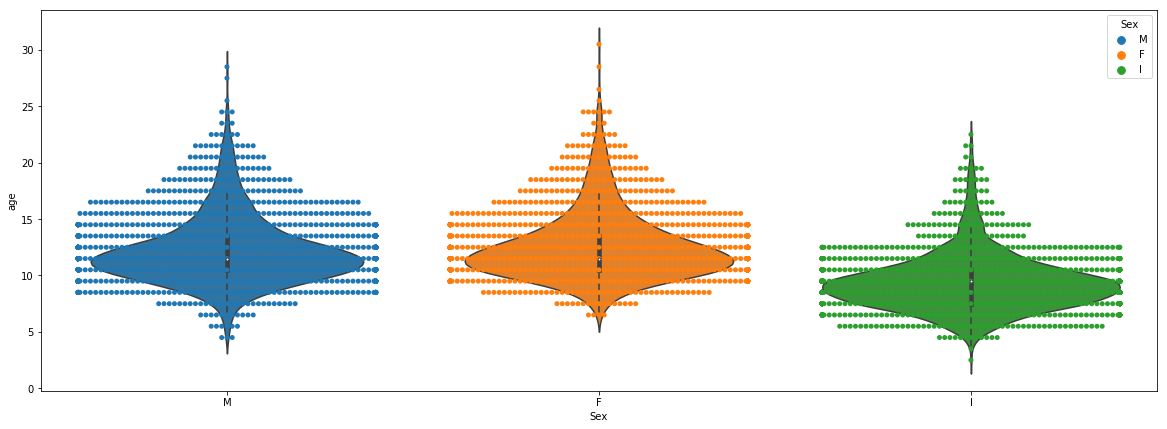

In [14]:
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Sex', y = 'age', data = df, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'age',data = df)

    Male : age majority lies in between 7.5 years to 19 years
    Female: age majority lies in between 8 years to 19 years
    Immature: age majority lies in between 6 years to < 10 years


# Data Preprocessing

In [15]:
# outlier handling
df = pd.get_dummies(df)
dummy_df = df

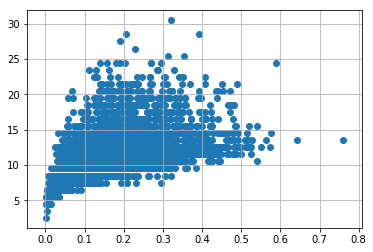

In [16]:
var = 'Viscera weight'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

In [17]:
df.drop(df[(df['Viscera weight'] > 0.5) &
          (df['age'] < 20)].index, inplace = True)
df.drop(df[(df['Viscera weight']<0.5) & (
df['age'] > 25)].index, inplace = True)

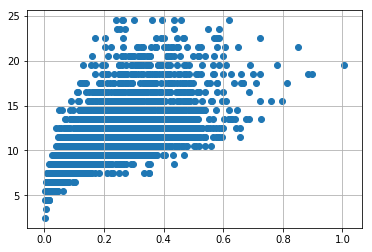

In [18]:
var = 'Shell weight'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

In [19]:
df.drop(df[(df['Shell weight'] > 0.6) &
          (df['age'] < 25)].index, inplace = True)
df.drop(df[(df['Shell weight']<0.8) & (
df['age'] > 25)].index, inplace = True)

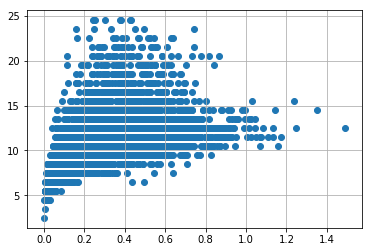

In [20]:
var = 'Shucked weight'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

In [21]:
df.drop(df[(df['Shucked weight'] >= 1) &
          (df['age'] < 20)].index, inplace = True)
df.drop(df[(df['Viscera weight']<1) & (
df['age'] > 20)].index, inplace = True)

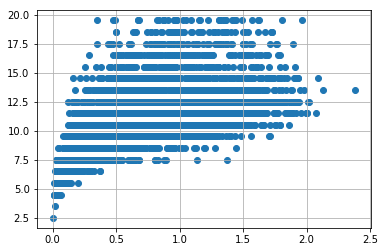

In [22]:
var = 'Whole weight'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

In [23]:
df.drop(df[(df['Whole weight'] >= 2.5) &
          (df['age'] < 25)].index, inplace = True)
df.drop(df[(df['Whole weight']<2.5) & (
df['age'] > 25)].index, inplace = True)

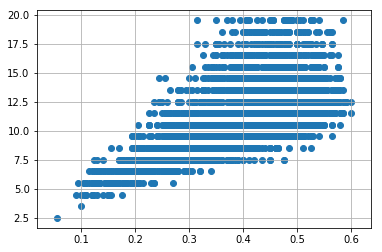

In [24]:
var = 'Diameter'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

In [25]:
df.drop(df[(df['Diameter'] <0.1) &
          (df['age'] < 5)].index, inplace = True)
df.drop(df[(df['Diameter']<0.6) & (
df['age'] > 25)].index, inplace = True)
df.drop(df[(df['Diameter']>=0.6) & (
df['age'] < 25)].index, inplace = True)

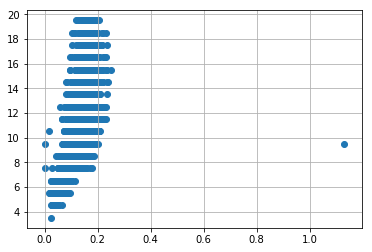

In [26]:
var = 'Height'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

In [27]:
df.drop(df[(df['Height'] > 0.4) &
          (df['age'] < 15)].index, inplace = True)
df.drop(df[(df['Height']<0.4) & (
df['age'] > 25)].index, inplace = True)

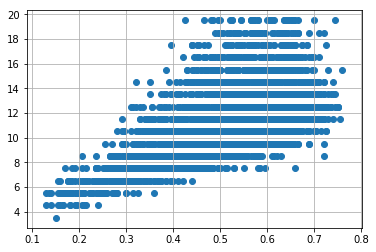

In [28]:
var = 'Length'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

In [29]:
df.drop(df[(df['Length'] <0.1) &
          (df['age'] < 5)].index, inplace = True)
df.drop(df[(df['Length']<0.8) & (
df['age'] > 25)].index, inplace = True)
df.drop(df[(df['Length']>=0.8) & (
df['age'] < 25)].index, inplace = True)

# Feature Selection and Standardization

In [30]:
X = df.drop('age', axis = 1)
y = df['age']

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest

In [32]:
standardScale = StandardScaler()
standardScale.fit_transform(X)

selectkBest = SelectKBest()
X_new = selectkBest.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25)











/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Model Selection

# 1)Linear regression

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)


In [36]:
 from sklearn.metrics import mean_absolute_error, mean_squared_error
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set :%2f'%s)

p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)

Mean Squared error of training set :3.551893
Mean Squared error of testing set :3.577687


In [37]:
from sklearn.metrics import r2_score
s = r2_score(y_train, y_train_pred)
print('R2 Score of training set:%.2f'%s)

p = r2_score(y_test, y_test_pred)
print('R2 Score of testing set:%.2f'%p)


R2 Score of training set:0.54
R2 Score of testing set:0.53


# 2)Ridge

In [38]:
from sklearn.linear_model import Ridge


In [39]:
ridge_mod = Ridge(alpha=0.01, normalize=True)
ridge_mod.fit(X_train, y_train)
ridge_mod.fit(X_test, y_test)
ridge_model_pred = ridge_mod.predict(X_test)
ridge_mod.score(X_train, y_train)

0.5307346478347332

In [40]:
ridge_mod.score(X_test, y_test)

0.5272608729607438

Text(0, 0.5, 'Predictions')

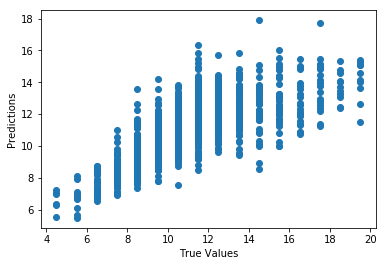

In [41]:
plt.scatter(y_test, ridge_model_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')


# 3)Support vector Regression

In [42]:
from sklearn.svm import SVR

In [43]:
# LINEAR KERNEL

svr = SVR(kernel = 'linear')
svr.fit(X_train, y_train)
svr.fit(X_test, y_test)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [44]:
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

svr.score(X_train, y_train)


0.4461014542389635

In [45]:

svr.score(X_test, y_test)

0.43681391121982105

# 4) RandomForestRegression

In [46]:
 from sklearn.ensemble import RandomForestRegressor


In [47]:
 regr = RandomForestRegressor(max_depth=2, random_state=0,
                              n_estimators=100)


In [48]:
regr.fit(X_train, y_train)
regr.fit(X_test, y_test)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [49]:
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

regr.score(X_train, y_train)

0.4287379777803546

In [50]:
regr.score(X_test, y_test)

0.43753106247261264

# 5)Gradient Boosting Regressor

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

In [52]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
gbr.fit(X_test, y_test)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [53]:
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)


regr.score(X_train, y_train)

0.4287379777803546

In [54]:
regr.score(X_test, y_test)

0.43753106247261264

# 6)KNeighborsRegressor

In [55]:
from sklearn.neighbors import KNeighborsRegressor

In [56]:
knn = KNeighborsRegressor(n_neighbors =4 )
knn.fit(X_train, y_train)
knn.fit(X_test, y_test)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=4, p=2,
          weights='uniform')

In [57]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)


knn.score(X_train, y_train)

0.4677575709446231

In [58]:
knn.score(X_test, y_test)

0.6856343678141352

you have seen the performance of each one of above model.

so according to you which model should we start or choose? 

"Suppose there exist two explanations for an occurrence. In this case the simpler one is usually better. Another way of saying it is that the more assumptions you have to make, the more unlikely an explanation." Hence, starting with the simplest model Ridge, for various reasons:

        - Feature Dimension is less
        - No misisng values
        - Few categorical features

# Hyperparameter Tunning Using GridSearchCV

In [59]:
# Hyperparameter Tuning using GridSearchCV

from sklearn.model_selection import  GridSearchCV
param  = {'alpha':[0.01, 0.1, 1,10,100],
         'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
glrm0 = GridSearchCV(estimator = Ridge(random_state=10,),
param_grid = param,scoring= 'r2' ,cv = 5,  n_jobs = -1)
glrm0.fit(X_train, y_train)
glrm0.best_params_, glrm0.best_score_


({'alpha': 0.1, 'solver': 'sag'}, 0.5308712206007367)

In [60]:
ridge_mod = Ridge(alpha=0.001,solver = 'sag', random_state = 10, normalize=True)
ridge_mod.fit(X_train, y_train)
ridge_mod.fit(X_test, y_test)
ridge_model_pred = ridge_mod.predict(X_test)
ridge_mod.score(X_train, y_train)

0.5331463016536355

In [61]:
ridge_mod.score(X_test, y_test)

0.534651599310652

After hyperparameter tuning, CV score has improve slightly while, R2_Score has decreased showing base model was overfit. 

we use tuning on different different model. 

https://www.kaggle.com/ragnisah/eda-abalone-age-prediction